# Expedia Personalised Hotel Searches
VU Data Mining Techniques 2024 | Assignment 2 | Group 17

## Setup & Data Loading

In [4]:
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [5]:
train_path = 'data/training_set_VU_DM.csv'
test_path = 'data/test_set_VU_DM.csv'

In [6]:
df = pd.read_csv(train_path)
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


## EDA
###### ToDo Jaime

In [7]:
competitive_metrics = ['compX_rate', 'compX_inv', "compX_rate_percent_diff"]
full_competitive_metrics = []
for metric in competitive_metrics:
    metric_list = []
    for x in range(1,9):
        metric_list.append(metric.replace("X", str(x)))
    full_competitive_metrics.append(metric_list)

In [8]:
len(df)

4958347

In [9]:
len(df[full_competitive_metrics[2]].dropna(axis = 'index', how = 'all'))

1580490

too much nan values

In [10]:
len(df[full_competitive_metrics[1]].dropna(axis = 'index', how = 'all'))

3352374

feature not relevant enough.

In [11]:
df['combined_comp_rate'] = df[full_competitive_metrics[0]].iloc[:, :].sum(axis=1)

In [12]:
comp_rate_nan_index = df.index.difference(df[full_competitive_metrics[0]].dropna(axis = 'index', how = 'all').index)
df.loc[comp_rate_nan_index, 'combined_comp_rate'] = np.nan

In [13]:
print(len(pd.unique(df['srch_id'])))
print(df['click_bool'].sum())
print(df['booking_bool'].sum())

199795
221879
138390


On average more clicks than searches. On average less bookings than searches. Makes sense

In [14]:
def plot_vars_dist(df):
    variables = [var for var in df if var not in ['srch_id','date_time']]  # ignoring these as they are only 1 value indicating occurence of a call/sms
    fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(10, 6 * len(variables)))

    for ax, var in zip(axes.flatten(), variables):
        var_data = df[var]
        mean = var_data.mean()
        std = var_data.std()
        # Adjust bins for better visualization based on data range and characteristics
        bins = min(30, int(var_data.nunique()))  # Use a minimum of 30 bins or less if fewer unique values

        ax.hist(var_data, bins=bins, alpha=0.75, color='blue', edgecolor='black', label=f'{var} Scores')
        ax.set_title(f'Distribution of {var} values')
        ax.set_xlabel(f'{var.capitalize()} Score')
        ax.set_ylabel('Frequency')
        ax.grid(axis='y', alpha=0.75)
        legend_label = f"Mean: {mean:.2f}, Std: {std:.2f}"
        ax.legend([f"{var.capitalize()} Scores\n{legend_label}"], loc='upper right', title='Statistics', frameon=True)

    plt.tight_layout()
    plt.show()

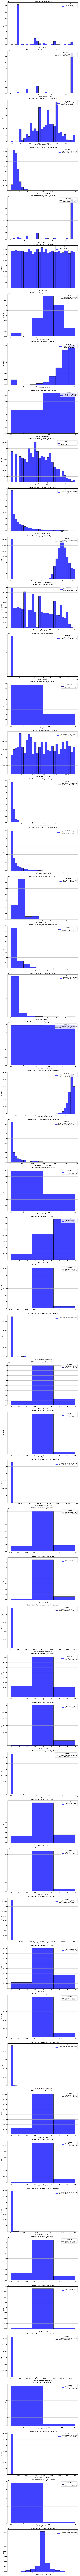

In [15]:
plot_vars_dist(df)

In [16]:
df_corr = df.drop(['srch_id','date_time'],axis = 1)

In [17]:
df_corr.corr()

,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,...,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,combined_comp_rate
site_id,1.000000,-0.305921,0.309078,0.099104,-0.312593,0.002943,0.174845,-0.071645,-0.196217,0.178399,...,-0.001217,-0.011761,-0.004750,0.012756,-0.005167,0.000152,0.008497,0.053015,-0.001354,0.039374
visitor_location_country_id,-0.305921,1.000000,-0.256252,-0.073231,0.482787,0.000432,-0.112911,0.064279,0.182405,-0.121392,...,0.004379,-0.006172,-0.017498,-0.016626,0.010390,-0.001532,-0.004806,-0.048212,0.002524,-0.036283
visitor_hist_starrating,0.309078,-0.256252,1.000000,0.498618,-0.285770,0.007933,0.295903,-0.000815,-0.183249,0.250895,...,-0.001198,-0.005446,-0.001889,0.034486,0.000307,0.004346,0.002541,0.104260,-0.002044,0.043633
visitor_hist_adr_usd,0.099104,-0.073231,0.498618,1.000000,-0.073566,0.000575,0.153966,0.046391,-0.057195,0.152472,...,0.004687,0.011371,-0.010601,0.006237,-0.002069,0.002971,0.003858,0.108476,0.000602,0.017158
prop_country_id,-0.312593,0.482787,-0.285770,-0.073566,1.000000,0.000162,-0.161729,0.092686,0.310493,-0.183344,...,-0.007162,-0.061137,-0.024660,-0.031299,0.011225,-0.002427,-0.006222,-0.064152,0.001227,-0.059641
prop_id,0.002943,0.000432,0.007933,0.000575,0.000162,1.000000,0.002553,-0.000103,0.000922,-0.003706,...,-0.005572,-0.002152,0.007769,0.003004,0.003048,-0.001985,0.000246,0.002713,-0.000508,0.000747
prop_starrating,0.174845,-0.112911,0.295903,0.153966,-0.161729,0.002553,1.000000,0.306454,0.021329,0.287322,...,-0.016826,-0.028579,-0.011136,0.037041,-0.030334,0.015429,0.030788,0.175424,0.021206,0.029376
prop_review_score,-0.071645,0.064279,-0.000815,0.046391,0.092686,-0.000103,0.306454,1.000000,0.203949,0.111115,...,-0.008081,0.003435,-0.009931,0.068148,-0.006711,0.006997,0.023424,0.076358,0.025800,0.030631
prop_brand_bool,-0.196217,0.182405,-0.183249,-0.057195,0.310493,0.000922,0.021329,0.203949,1.000000,-0.184617,...,-0.002585,-0.062500,-0.036992,-0.011238,-0.057156,-0.001317,0.000866,-0.033181,0.009991,-0.038328
prop_location_score1,0.178399,-0.121392,0.250895,0.152472,-0.183344,-0.003706,0.287322,0.111115,-0.184617,1.000000,...,-0.001695,0.038725,-0.003553,0.012608,-0.005817,0.012368,0.002184,0.142669,-0.003273,0.048487


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 55 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   srch_id                      int64  
 1   date_time                    object 
 2   site_id                      int64  
 3   visitor_location_country_id  int64  
 4   visitor_hist_starrating      float64
 5   visitor_hist_adr_usd         float64
 6   prop_country_id              int64  
 7   prop_id                      int64  
 8   prop_starrating              int64  
 9   prop_review_score            float64
 10  prop_brand_bool              int64  
 11  prop_location_score1         float64
 12  prop_location_score2         float64
 13  prop_log_historical_price    float64
 14  position                     int64  
 15  price_usd                    float64
 16  promotion_flag               int64  
 17  srch_destination_id          int64  
 18  srch_length_of_stay          int64  
 19  

In [19]:
df.describe()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,combined_comp_rate
count,4.958347e+06,4.958347e+06,4.958347e+06,251866.000000,252988.000000,4.958347e+06,4.958347e+06,4.958347e+06,4.950983e+06,4.958347e+06,...,315348.000000,356422.000000,138515.000000,1.916654e+06,1.987503e+06,614730.000000,4.958347e+06,138390.000000,4.958347e+06,3.241539e+06
mean,1.663666e+05,9.953133e+00,1.753405e+02,3.374334,176.022659,1.739739e+02,7.007918e+04,3.180525e+00,3.777777e+00,6.346994e-01,...,0.145969,0.083202,19.433267,-6.089936e-02,9.962752e-03,22.430384,4.474858e-02,386.283316,2.791051e-02,5.521328e-02
std,9.611223e+04,7.646890e+00,6.591625e+01,0.692519,107.254493,6.834525e+01,4.060992e+04,1.051024e+00,1.050329e+00,4.815144e-01,...,0.578202,0.316722,54.370221,4.691723e-01,2.029142e-01,895.965854,2.067514e-01,821.190577,1.647165e-01,1.096373e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.410000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.000000,-1.000000,2.000000,-1.000000e+00,-1.000000e+00,2.000000,0.000000e+00,0.000000,0.000000e+00,-6.000000e+00
25%,8.293600e+04,5.000000e+00,1.000000e+02,2.920000,109.810000,1.000000e+02,3.501000e+04,3.000000e+00,3.500000e+00,0.000000e+00,...,0.000000,0.000000,7.000000,0.000000e+00,0.000000e+00,7.000000,0.000000e+00,124.000000,0.000000e+00,0.000000e+00
50%,1.665070e+05,5.000000e+00,2.190000e+02,3.450000,152.240000,2.190000e+02,6.963800e+04,3.000000e+00,4.000000e+00,1.000000e+00,...,0.000000,0.000000,12.000000,0.000000e+00,0.000000e+00,11.000000,0.000000e+00,218.400000,0.000000e+00,0.000000e+00
75%,2.497240e+05,1.400000e+01,2.190000e+02,3.930000,213.490000,2.190000e+02,1.051680e+05,4.000000e+00,4.500000e+00,1.000000e+00,...,1.000000,0.000000,20.000000,0.000000e+00,0.000000e+00,17.000000,0.000000e+00,429.790000,0.000000e+00,0.000000e+00
max,3.327850e+05,3.400000e+01,2.310000e+02,5.000000,1958.700000,2.300000e+02,1.408210e+05,5.000000e+00,5.000000e+00,1.000000e+00,...,1.000000,1.000000,9900.000000,1.000000e+00,1.000000e+00,149400.000000,1.000000e+00,159292.380000,1.000000e+00,6.000000e+00


In [20]:
df.isnull().sum()

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        4706481
visitor_hist_adr_usd           4705359
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7364
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           1090348
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      4640941
orig_destination_distance

If a visitor has a history of purchasing hotels (value for visitor_hist_starrating, visitor_hist_adr_usd) - it might be advantageous to higher weight their behaviour in our model. Because they are more likely to completely go through the booking process.

## Data Preprocessing
###### ToDo Ryan

### Dropping Features with Many Missing Values

In [21]:
# create a list of columns to drop where more than 50% of the data is missing
columns_to_drop = df.columns[df.isnull().mean() > 0.5].tolist()
pprint(f'Columns that are dropped due to excessive missing values: {columns_to_drop}')
df.drop(columns=columns_to_drop, inplace=True)

('Columns that are dropped due to excessive missing values: '
 "['visitor_hist_starrating', 'visitor_hist_adr_usd', "
 "'srch_query_affinity_score', 'comp1_rate', 'comp1_inv', "
 "'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv', "
 "'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv', "
 "'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv', "
 "'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv', "
 "'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv', "
 "'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv', "
 "'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv', "
 "'comp8_rate_percent_diff', 'gross_bookings_usd']")


In [22]:
df.isnull().sum()

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7364
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           1090348
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
orig_destination_distance      1607782
random_bool                          0
click_bool                           0
booking_bool             

### Datatype Conversion

In [23]:
df['date_time'] = pd.to_datetime(df['date_time'])

boolean_features = ['prop_brand_bool', 'promotion_flag', 'srch_saturday_night_bool', 'random_bool', 'click_bool', 'booking_bool']
for col in boolean_features:
    df[col] = df[col].astype('bool')
    
categorical_features = ['site_id', 'visitor_location_country_id', 'prop_country_id', 'srch_destination_id']  # 'srch_id', 'prop_id' are not included because they are not categorical
for col in categorical_features:
    df[col] = df[col].astype('category')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 27 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   srch_id                      int64         
 1   date_time                    datetime64[ns]
 2   site_id                      category      
 3   visitor_location_country_id  category      
 4   prop_country_id              category      
 5   prop_id                      int64         
 6   prop_starrating              int64         
 7   prop_review_score            float64       
 8   prop_brand_bool              bool          
 9   prop_location_score1         float64       
 10  prop_location_score2         float64       
 11  prop_log_historical_price    float64       
 12  position                     int64         
 13  price_usd                    float64       
 14  promotion_flag               bool          
 15  srch_destination_id          category      
 16  

In [24]:
# Print the number of unique values for each categorical feature
for col in categorical_features:
    print(f'{col}: {df[col].nunique()}')

site_id: 34
visitor_location_country_id: 210
prop_country_id: 172
srch_destination_id: 18127


### Handling Missing Values

In [25]:
# Check the dataset again
df.isnull().sum()

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7364
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           1090348
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
orig_destination_distance      1607782
random_bool                          0
click_bool                           0
booking_bool             

In [26]:
# Fill missing values using a dictionary within the `fillna` method, avoiding the `inplace=True` argument to prevent annoying FutureWarnings
df = df.fillna({
    'prop_review_score': df['prop_review_score'].median(),  # Fill missing values for 'prop_review_score' using median as there's not too many missing values and it makes sense for a 5-star rating of properties
    'prop_location_score2': df['prop_location_score2'].mean(),  # For 'prop_location_score2', we fillna using the mean since it's a score
    'orig_destination_distance': df['orig_destination_distance'].mean()  # For 'orig_destination_distance' we will also take the mean distance as filler value
})

In [27]:
df.isnull().sum()

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                    0
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2                 0
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
orig_destination_distance            0
random_bool                          0
click_bool                           0
booking_bool             

### Handling Outliers
Everything below here is still wip

ToDo! Based on what EDA shows we could use z-score or IQR

In [28]:
# Example
Q1 = df['price_usd'].quantile(0.25)
Q3 = df['price_usd'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply the bounds to the data
df = df[(df['price_usd'] >= lower_bound) & (df['price_usd'] <= upper_bound)]

### Normalising/Standardising Numerical Features

Normalisation (scaling data between 0 and 1) or standardisation (shifting the distribution to have a mean of zero and a standard deviation of one) can be beneficial for algorithms that are sensitive to the scale of input data (like SVM or KNN).

In [29]:
# Example
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Example: Standardizing 'price_usd'
scaler = StandardScaler()
df['price_usd'] = scaler.fit_transform(df[['price_usd']])

# Or for normalization
# scaler = MinMaxScaler()
# df['price_usd'] = scaler.fit_transform(df[['price_usd']])

### Encoding Categorical Variables

In [30]:
# Example for 1-hot encoding a categorical feature
df = pd.get_dummies(df, columns=['prop_country_id'], drop_first=True)

### Feature Engineering

Ideas for this:
1. Time Features: Break down the date_time column into year, month, day, weekday, and hour components. Time could affect booking patterns.
2. Interaction Features: Create features that represent interactions between the customer’s historical preferences and property attributes, like the difference between the user’s average star rating and the property’s star rating.
3. Textual and Categorical Embeddings: If there are textual descriptions available or high-cardinality categorical variables, consider using embeddings or hashing techniques to reduce their dimensionality.

In [31]:
# Create time-based features
df['year'] = df['date_time'].dt.year
df['month'] = df['date_time'].dt.month
df['day'] = df['date_time'].dt.day
df['weekday'] = df['date_time'].dt.weekday
df['hour'] = df['date_time'].dt.hour

# Interaction feature: difference between user's average star rating and property's star rating
df['starrating_diff'] = df['visitor_hist_starrating'] - df['prop_starrating']

# Re-check the dataset
df.head()

KeyError: 'visitor_hist_starrating'